# Scaling
Image scaling is a smart way for preprocessing image data, ideally after noise and background removal. It allows reducing image size to a degree that the scientific question can still be answered, while also dealing with memory constraints. E.g. in case the computer complains about out-of-memory errors, scaling an image to a smaller size is the first go-to method to proceed with a project. Furthermore, there are many segmentation algorithms and quantitative measurement methods which have pixel/voxel isotropy as precondition: Voxels must have the same size in all directions, otherwise the results of such algorithms might be misleading or even wrong.

In [1]:
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt
from skimage.io import imread

To demonstrate scaling, we're using a cropped and resampled image data from the [Broad Bio Image Challenge](https://bbbc.broadinstitute.org/BBBC032):
Ljosa V, Sokolnicki KL, Carpenter AE (2012). Annotated high-throughput microscopy image sets for validation. Nature Methods 9(7):637 / doi. PMID: 22743765 PMCID: PMC3627348. Available at http://dx.doi.org/10.1038/nmeth.2083

In [2]:
input_image = imread("../../data/BMP4blastocystC3-cropped_resampled_8bit.tif")

# voxel size is not equal in all directions; 
# the voxels are anisotropic.
voxel_size_x = 0.202
voxel_size_y = 0.202
voxel_size_z = 1

When visualizing projections of that dataset along the three axes, you see that the voxels are not isotropic. 

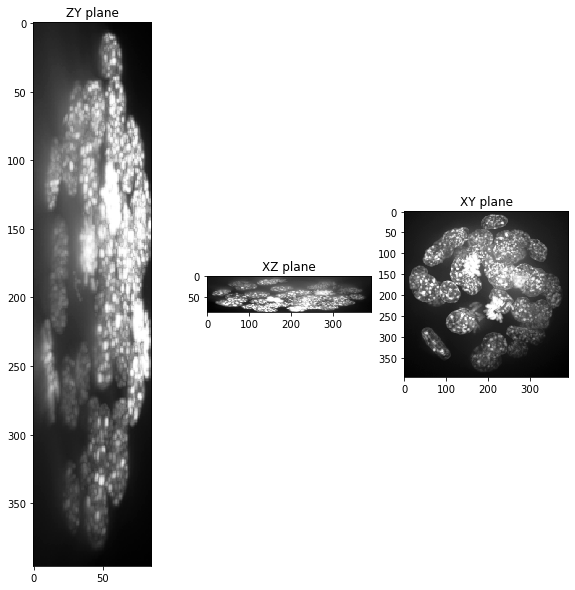

In [3]:
def show(image_to_show, labels=False):
    """
    This function generates three projections: in X-, Y- and Z-direction and shows them.
    """
    projection_x = cle.maximum_x_projection(image_to_show)
    projection_y = cle.maximum_y_projection(image_to_show)
    projection_z = cle.maximum_z_projection(image_to_show)

    fig, axs = plt.subplots(1, 3, figsize=(10, 10))
    cle.imshow(projection_x, plot=axs[0], labels=labels)
    cle.imshow(projection_y, plot=axs[1], labels=labels)
    cle.imshow(projection_z, plot=axs[2], labels=labels)
    axs[0].set_title("ZY plane")
    axs[1].set_title("XZ plane")
    axs[2].set_title("XY plane")
    plt.show()

show(input_image)

## Scaling with the voxel size
The easiest way for fixing this problem is to scale the dataset with its voxel size. Per definition, this will result in a dataset where the voxels are isotropic and have `voxel_size = 1` (microns in our case) in all directions.

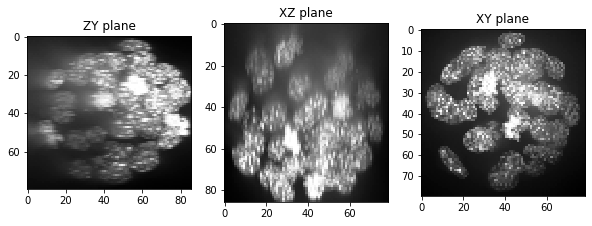

In [4]:
scale_factor_x = voxel_size_x
scale_factor_y = voxel_size_y
scale_factor_z = voxel_size_z

resampled = cle.scale(input_image, 
                      factor_x=scale_factor_x, 
                      factor_y=scale_factor_y, 
                      factor_z=scale_factor_z, 
                      linear_interpolation=True,
                      auto_size=True)

show(resampled)

The resampled stack has now less voxels in X and Y, which might be a problem when it comes to segmenting the objects accurately. We can see this clearly by printing out the shape of the original data and the resampled image. This is the size of the image stack in depth-height-width (Z-Y-X).

In [5]:
input_image.shape

(86, 396, 393)

In [6]:
resampled.shape

(86, 80, 79)

A potential solution is to introduce a `zoom_factor`. It allows tuning how large the resampled image will be:

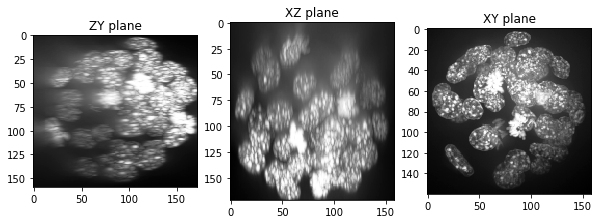

In [7]:
zoom_factor = 2

scale_factor_x = voxel_size_x * zoom_factor
scale_factor_y = voxel_size_y * zoom_factor
scale_factor_z = voxel_size_z * zoom_factor

resampled_zoomed = cle.scale(input_image, 
                      factor_x=scale_factor_x, 
                      factor_y=scale_factor_y, 
                      factor_z=scale_factor_z, 
                      linear_interpolation=True,
                      auto_size=True)

show(resampled_zoomed)

In [8]:
resampled_zoomed.shape

(172, 160, 159)

When zooming/scaling 3D images, keep memory limitations in mind. You can read the size of the images in the box on the right in the following view. Zooming an image by factor 2, like in the example above, increases the image size of a 3D stack by factor 8 (2x2x2).

cl.OCLArray([[[19.976562  , 20.        , 20.12207   , ..., 20.995056  ,
         19.996155  , 19.889374  ],
        [20.        , 19.14293   , 20.074219  , ..., 20.074219  ,
         20.151886  , 20.8125    ],
        [20.        , 19.884277  , 20.        , ..., 21.69043   ,
         20.731445  , 20.113281  ],
        ...,
        [ 8.        ,  8.9878235 , 10.104492  , ...,  6.1640625 ,
          7.        ,  5.8545227 ],
        [ 8.889374  ,  8.925781  ,  8.224121  , ...,  6.6996765 ,
          5.2587585 ,  5.        ],
        [ 8.021973  ,  8.879639  ,  8.0625    , ...,  6.        ,
          5.9375    ,  5.8867188 ]],

       [[18.99945   , 19.904083  , 19.        , ..., 19.976562  ,
         19.019592  , 19.        ],
        [20.        , 19.        , 20.        , ..., 19.464783  ,
         19.151886  , 19.934189  ],
        [19.        , 19.810059  , 19.765625  , ..., 20.81543   ,
         20.        , 19.113281  ],
        ...,
        [ 8.        ,  8.226105  ,  9.104492  , ...,  6.        ,
          5.3012085 ,  5.8867188 ],
        [ 8.        ,  8.991592  ,  8.        , ...,  6.        ,
          5.7598267 ,  5.0128326 ],
        [ 8.        ,  8.        ,  8.        , ...,  5.0493164 ,
          5.052246  ,  5.        ]],

       [[18.022888  , 19.904083  , 19.020508  , ..., 18.794006  ,
         19.        , 19.        ],
        [19.        , 19.925781  , 19.189941  , ..., 20.        ,
         19.151886  , 19.        ],
        [18.023438  , 19.009277  , 19.        , ..., 20.875     ,
         19.979492  , 19.        ],
        ...,
        [ 7.996155  ,  8.773895  ,  8.979492  , ...,  5.965393  ,
          5.862854  ,  5.        ],
        [ 8.        ,  8.886719  ,  8.        , ...,  6.        ,
          5.094696  ,  5.1004486 ],
        [ 8.        ,  8.        ,  7.9921875 , ...,  5.        ,
          5.8359375 ,  5.        ]],

       ...,

       [[ 1.        ,  1.0724792 ,  1.        , ...,  2.        ,
          2.8163452 ,  2.        ],
        [ 1.9765625 ,  1.9944916 ,  1.875     , ...,  2.195282  ,
          2.        ,  2.        ],
        [ 1.0205078 ,  1.8100586 ,  2.        , ...,  2.9013672 ,
          2.2480469 ,  2.224121  ],
        ...,
        [ 0.9804077 ,  2.        ,  1.        , ...,  2.965393  ,
          2.8359375 ,  2.        ],
        [ 0.13406372,  0.24490356,  1.        , ...,  2.1870422 ,
          2.1454773 ,  2.        ],
        [ 1.        ,  1.        ,  1.        , ...,  2.        ,
          1.2163086 ,  2.        ]],

       [[ 1.9536743 ,  1.0742188 ,  1.        , ...,  2.0049438 ,
          2.        ,  2.        ],
        [ 1.0724792 ,  1.        ,  1.        , ...,  2.        ,
          2.        ,  1.1790924 ],
        [ 1.1220703 ,  1.1157227 ,  1.875     , ...,  2.7890625 ,
          2.        ,  2.        ],
        ...,
        [ 1.        ,  1.0620422 ,  1.7314453 , ...,  2.965393  ,
          2.725708  ,  2.0185852 ],
        [ 1.        ,  1.        ,  1.875     , ...,  2.        ,
          2.0185852 ,  2.1004486 ],
        [ 0.97802734,  1.9375    ,  1.        , ...,  2.        ,
          2.        ,  1.9445801 ]],

       [[ 1.9536743 ,  1.        ,  1.0205078 , ...,  2.0049438 ,
          2.        ,  2.        ],
        [ 1.        ,  1.0055084 ,  1.0742188 , ...,  2.7304993 ,
          2.9379578 ,  1.9341888 ],
        [ 0.8779297 ,  1.        ,  1.890625  , ...,  2.9013672 ,
          2.        ,  2.875     ],
        ...,
        [ 1.        ,  1.151886  ,  1.0205078 , ...,  3.        ,
          2.862854  ,  2.0185852 ],
        [ 0.0234375 ,  0.93418884,  1.        , ...,  2.7890625 ,
          2.        ,  2.        ],
        [ 1.        ,  1.0578613 ,  1.        , ...,  2.7890625 ,
          2.        ,  2.        ]]], dtype=float32)
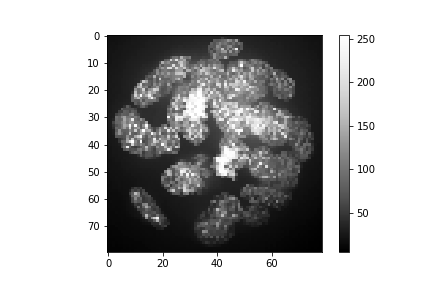
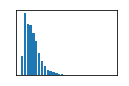

In [9]:
resampled

cl.OCLArray([[[14.25      , 14.25      , 14.826965  , ..., 14.25      ,
         14.736328  , 13.757721  ],
        [14.961914  , 14.25      , 15.        , ..., 14.841797  ,
         14.25      , 14.351715  ],
        [14.803711  , 14.65686   , 14.838867  , ..., 14.941406  ,
         14.583252  , 14.871094  ],
        ...,
        [ 6.359047  ,  6.        ,  6.1812744 , ...,  3.75      ,
          3.8426971 ,  4.4164124 ],
        [ 6.587448  ,  6.        ,  6.088623  , ...,  3.75      ,
          3.9683533 ,  4.2643433 ],
        [ 5.94096   ,  6.        ,  6.        , ...,  3.75      ,
          3.6037216 ,  4.1842804 ]],

       [[18.846611  , 19.        , 19.576965  , ..., 18.78125   ,
         19.398438  , 18.25772   ],
        [19.698112  , 19.155655  , 19.802734  , ..., 19.591797  ,
         18.76854   , 19.13562   ],
        [19.594727  , 19.40686   , 19.588867  , ..., 19.623047  ,
         19.444702  , 19.871094  ],
        ...,
        [ 8.31662   ,  8.        ,  8.153809  , ...,  5.        ,
          5.2548065 ,  5.6664124 ],
        [ 8.587448  ,  7.7929688 ,  8.088623  , ...,  5.005371  ,
          5.3526    ,  5.5143433 ],
        [ 7.8952103 ,  7.940666  ,  8.        , ...,  5.        ,
          4.9151764 ,  5.2895203 ]],

       [[18.539833  , 19.        , 19.192322  , ..., 18.34375   ,
         18.898438  , 18.085907  ],
        [19.1959    , 19.466965  , 19.408203  , ..., 19.197266  ,
         18.305618  , 19.13562   ],
        [19.307617  , 19.13562   , 19.19629   , ..., 19.02539   ,
         19.445435  , 19.957031  ],
        ...,
        [ 7.992401  ,  8.        ,  7.9780273 , ...,  5.        ,
          5.517227  ,  5.2221375 ],
        [ 8.195816  ,  7.3789062 ,  8.029541  , ...,  5.0161133 ,
          5.475525  ,  5.1714478 ],
        [ 7.843071  ,  7.8219986 ,  8.        , ...,  5.        ,
          5.135605  ,  4.7104797 ]],

       ...,

       [[ 1.0171242 ,  1.        ,  1.3806763 , ...,  2.171753  ,
          2.042427  ,  2.0112457 ],
        [ 1.7890625 ,  1.        ,  1.        , ...,  2.09375   ,
          2.0185394 ,  2.        ],
        [ 0.9795532 ,  1.7768555 ,  1.2792969 , ...,  2.0507812 ,
          2.        ,  2.        ],
        ...,
        [ 1.0230026 ,  1.2080536 ,  1.        , ...,  2.        ,
          2.        ,  2.2911377 ],
        [ 0.50772095,  0.97280884,  1.        , ...,  2.0375977 ,
          2.        ,  2.5143433 ],
        [ 0.9444847 ,  0.87722015,  1.0516968 , ...,  2.        ,
          1.9512405 ,  1.8131866 ]],

       [[ 1.0513725 ,  1.        ,  1.1268921 , ...,  2.057251  ,
          2.1272812 ,  2.0337372 ],
        [ 1.7890625 ,  1.        ,  1.        , ...,  2.03125   ,
          2.0556183 ,  2.        ],
        [ 0.93865967,  1.6206055 ,  1.4082031 , ...,  2.0742188 ,
          2.        ,  2.        ],
        ...,
        [ 1.0690079 ,  1.0693512 ,  1.        , ...,  2.        ,
          2.        ,  2.2911377 ],
        [ 0.835907  ,  0.9909363 ,  1.        , ...,  2.112793  ,
          2.        ,  2.1714478 ],
        [ 0.83345413,  0.75855255,  1.1550903 , ...,  2.        ,
          1.8537216 ,  1.9377289 ]],

       [[ 0.8013725 ,  0.75      ,  0.75      , ...,  1.5       ,
          1.6272812 ,  1.5337372 ],
        [ 1.3417969 ,  0.75      ,  0.75      , ...,  1.5       ,
          1.5556183 ,  1.5       ],
        [ 0.68865967,  1.1568604 ,  1.1044922 , ...,  1.5644531 ,
          1.5       ,  1.5       ],
        ...,
        [ 0.8190079 ,  0.75      ,  0.75      , ...,  1.5       ,
          1.5       ,  1.7183533 ],
        [ 0.75      ,  0.75      ,  0.75      , ...,  1.612793  ,
          1.5       ,  1.5       ],
        [ 0.58345413,  0.52441406,  0.90509033, ...,  1.5       ,
          1.3537216 ,  1.5       ]]], dtype=float32)
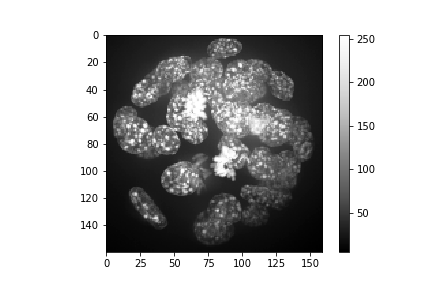
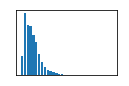

In [10]:
resampled_zoomed

## Exercise 
Increase the zoom factor and rerun the code above. At which zoom factor does the program crash? How large would the image be that would be generated if it didn't crash? How much memory does your graphics card have?